This assignment is due 5 days after the end of class. Section 1: Due Sat 4:00 pm Section 2: Due M 4:00 pm Section 3 Due M 12:00 pm

Please submit a zipped file of your Jupyter notebook folder (including any data or images). Use with the following naming convention: Last_First_Section_Lab.zip Use the corresponding title for "Lab" in your filename: FaradayRotation MagneticMoment EF-NMR JohnsonNoise GammaCoincidence HallEffect AnalogComputing ComptonScattering OpticalPumping For example: Brown_Ethan_Section1_OpticalPumping.zip

Use the same convention for the .ipynb file as well. You also must write this information in a markdown at the top of the Jupyter notebook.

## Introduction

The Hall Effect is the creation of a potential difference across an electrical conductor. This potential difference is called the Hall voltage. The Hall voltage is only present when there is current flowing through the conductor in the presence of an external magnetic field. The equation used to calculate Hall voltage is:

$$U_h = R_h*\frac{I*B}{d}$$

Where $U_h$ is the Hall voltage, $R_h$ is the Hall coefficient, $I$ is the current flowing through the conductor, $B$ is the strength of the external magnetic field, and $d$ is the thickness of the conductor. The Hall coefficient is determined by the density and mobility of holes and electrons in the conductor, where a hole is the absence of an electron that was at the valence energy level before being excited out of the energy level by the external magnetic field.

The density of holes in a conductor can be written as a function of Hall voltage:

$$p_s = \frac{B}{q*d*U_h}$$

Where $p_s$ is the desnity of holes, $B$ is the strength of the external magnetic field, $q$ is the charge of an electron ($1.6*10^{-19} C), $d$ is the thickness of the conductor, and $U_h$ is the Hall Voltage.

The mobility of holes in a conductor can also be written as a function of Hall voltage:

$$\mu_p = \frac{U_h*w}{b*B*U}$$

Where $\mu_p$ is the mobility of holes, $U_h$ is the Hall voltage, $w$ is the width of the conductor, $b$ is the height of the conductor, $B$ is the strength of the external magnetic field, and $U$ is the voltage driving the current flowing through the conductor.

The velocity of the holes through the conductor is the same as the velocity of the electrons, which is:

$$v_p = \frac{U_h}{b*B}$$

Where $v_p$ is the velocity of the holes, $U_h$ is the Hall voltage, $b$ is the height of the conductor, and $B$ is the strength of the external magnetic field.

The Hall coefficient of a conductor changes as temperature of the conductor changes, as shown by this equation:

$$R_h = \frac{p_s + (\sqrt{0.25*p_s^2 + \eta^2}-0.5*p_s)*(1-k^2)}{q*(p_s + (\sqrt{0.25*p_s^2 + \eta^2}-0.5*p_s)*(1+k^2))^2}$$

Where $R_h$ is the Hall coefficient, $p_s$ is the hole density, $\eta$ is the effective state density, $k$ is the ratio of the electron and hole mobilities, and $q$ is the charge of an electron. The effective state density is the square root of the product of the electron and hole densities, and can be described like so:

$$\eta^2 = N_0^2*e^{\frac{E_g}{k_B*T}}$$

Where $\eta$ is the effective state density, $N_0$ is a constant based on the densities of holes and electrons, $E_g$ is the gap in energy between the valence energy level and the energy level at which the electrons are free to move through the conductor, $k_B$ is the Boltzman constant ($8.62*10^{-5} eV/K$), and $T$ is the temperature of the conductor in Kelvin.

The conductivity of a conductor can be written as a function of temperature:

$$\sigma = \sigma_0*(\frac{T}{T_0})^n$$

Where $\sigma$ is the conductivity of the conductor, $\sigma_0$ is the conductivity of the conductor at room temperature, $T$ is the temperature of the conductor, $T_0$ is room temperature, and $n$ is a free parameter based on the temperature. This equation can be rewritten such that $n$ is the slope of a linear function.

$$\ln(\sigma) - \ln(\sigma_0) = n*[\ln(T) - \ln(T_0)]$$

## Procedure

- Required Materials
    - Two Digital Multimeters
    - Base Unit for Hall Effect experiment
    - Gaussmeter
    - Gaussmeter probe
    - Three DC power supplies
    - Thermometer
    - Banana cables

- Setup
    - Connect a DC power supply to the two outlets on the bottom of the front side of the base unit. This will be the magnetic field source.
    - Connect another DC power supply to the two outlets on the left side of the base unit. This will supply the heater circuit.
    - Connect another DC power supply to the far left and far right outlets on the front of the base unit. Make sure to connect a multimeter in this connection in order to measure the current. This power supply will supply a sample current to pass through the crystal.
    - Connect a multimeter to the two outlets directly above and below the rectangle with a black border on the front of the base unit. This multimeter will measure the Hall voltage.
    - Place the Gaussmeter probe directly in front of the crystal without it touching the crystal.
    - Set the sample current to the maximum value ($30mA$), switch the compensation circuit ON and zero the Hall voltage using the compensation knob. 

- Part I
    - On the power supply used to create a magnetic field, set the current to $5.0 A$.
    - Vary the sample current in $0.003 A$ increments and measure the corresponding Hall voltages. Repeat until a sufficient number of data points are collected.
    - Note: In order to measure the magnetic field strength, multiply the output of the Gaussmeter by $1.29$. This $1.29$ constant has a standard deviation of $0.03$.

- Part II
    - Set the sample current to $0.020 A$.
    - Vary the current supplying the magnetic field and measure the corresponding Hall voltage.
    - For each variation, measure the magnetic field from the Gaussmeter.

- Part III
    - Set the current supplying the magnetic field to $5.0 A$.
    - Connect one end of a wire to the thermometer and the other end to the crystal in order to measure the temperature. Make sure the wire is touching the crystal.
    - Press the heater button on the base unit to begin heating the crystal.
    - Measure the Hall voltage for corresponding temperatures in $5^{\circ} C$ increments up to $130^{\circ} C$.

- Extra Credit
    - Disconnect the cables used for measuring the Hall voltage.
    - Connect one of these cables to the far right of the front of the base unit (there should already be a cable there for measuring sample current), and the other cable to the outlet to the right of the other cable used for sample current. This new connection allows measurement of the sample voltage.
    - Let the crystal cool down to room temperature by turning off the power supply to the heater circuit.
    - Once the crystal reaches room temperature, measure the sample voltage and sample current, and record the temperature of the crystal.
    - Turn the heater power supply back on and press the heater button on the base unit.
    - Measure the sample voltage and sample current that corresponds to the varying temperatures in increments of $5^{\circ} C$ up until $130^{\circ} C$.
    

## Analysis

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.odr as odr
import matplotlib.patches as mpatches
from IPython.display import HTML, display

np.set_printoptions(precision=2)

In [3]:
def linear(param,x):
    return param[0]*x + param[1]

def hall_fit(param,x):
    # 0 p_s
    # 1 N_0
    # 2 E_g
    # 3 k
    
    k_b = 8.62e-05
    q = 1.6e-19
    
    eta_sq = (param[1]**2)*np.exp(-param[2]/(k_b*x))
    first = np.sqrt((0.25*(param[0]**2))+eta_sq)-(0.5*param[0])
    numer = param[0] + (first*(1-(param[3]**2)))
    denom = (param[0] + (first*(1+(param[3]**2))))**2
    return numer/(q*denom)

Beta: [8.04e-01 3.50e-04]
Beta Std Error: [0.01 0.  ]
Beta Covariance: [[ 1.18e-01 -2.12e-03]
 [-2.12e-03  4.87e-05]]
Residual Variance: 0.001173104196652009
Inverse Condition #: 0.009877731971392223
Reason(s) for Halting:
  Sum of squares convergence


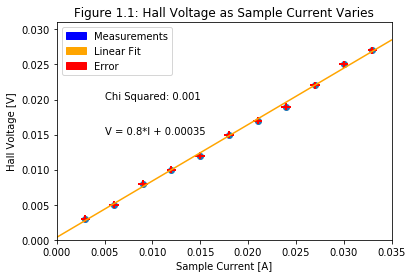


Figure 1.2: Density, Mobility, and Velocity of Holes


Sample Current [A],Hall Voltage [V],Density of Holes [m^-3],Mobility of Holes [m/s/eV],Velocity of Holes [m/s]
0.033 ± 0.0005,0.027 ± 0.0005,2.6e+26 ± 1.7e+25,4e-06 ± 2.9e-07,0.0024 ± 0.00015
0.03 ± 0.0005,0.025 ± 0.0005,2.8e+26 ± 1.9e+25,3.7e-06 ± 2.7e-07,0.0022 ± 0.00015
0.027 ± 0.0005,0.022 ± 0.0005,3.2e+26 ± 2.2e+25,3.2e-06 ± 2.5e-07,0.0019 ± 0.00013
0.024 ± 0.0005,0.019 ± 0.0005,3.7e+26 ± 2.7e+25,2.8e-06 ± 2.2e-07,0.0017 ± 0.00012
0.021 ± 0.0005,0.017 ± 0.0005,4.2e+26 ± 3.1e+25,2.5e-06 ± 2.1e-07,0.0015 ± 0.00011
0.018 ± 0.0005,0.015 ± 0.0005,4.7e+26 ± 3.8e+25,2.2e-06 ± 1.9e-07,0.0013 ± 0.0001
0.015 ± 0.0005,0.012 ± 0.0005,5.9e+26 ± 5.2e+25,1.8e-06 ± 1.7e-07,0.0011 ± 9.3e-05
0.012 ± 0.0005,0.01 ± 0.0005,7.1e+26 ± 6.8e+25,1.5e-06 ± 1.5e-07,0.00088 ± 8.5e-05
0.009 ± 0.0005,0.008 ± 0.0005,8.9e+26 ± 9.6e+25,1.2e-06 ± 1.4e-07,0.0007 ± 7.6e-05
0.006 ± 0.0005,0.005 ± 0.0005,1.4e+27 ± 2.1e+26,7.3e-07 ± 1.1e-07,0.00044 ± 6.4e-05


In [4]:
# ------------------------------------------- Part I ------------------------------------------------------------
B_false = 880
dB_false = 20
B_true = B_false*1.29
d_const = 0.03
dB_true = B_true*((dB_false/B_false)+(d_const/1.29))

I = np.array([0.033,0.030,0.027,0.024,0.021,0.018,0.015,0.012,0.009,0.006,0.003]) # Sample current in Amps
dI = 0.0005
HV = np.array([0.027,0.025,0.022,0.019,0.017,0.015,0.012,0.010,0.008,0.005,0.003]) # Hall Voltage in Volts
dHV = 0.0005

plt.scatter(I,HV)
plt.errorbar(I,HV,yerr=dHV,xerr=dI,fmt="none",color='red',elinewidth=2,linewidth=0,marker = '.',
             markersize = 10,label = 'Error')
plt.title("Figure 1.1: Hall Voltage as Sample Current Varies")
plt.xlabel("Sample Current [A]")
plt.ylabel("Hall Voltage [V]")

linear_fit = odr.Model(linear)
my_data_1 = odr.RealData(I, HV, sx = np.std(I), sy = np.std(HV))
regressed_model_1 = odr.ODR(my_data_1,linear_fit,beta0=[-0.8038,-3.497e-04])
regressed_output_1 = regressed_model_1.run()
regressed_output_1.pprint() 

X = np.linspace(0,0.035,11)

fitted_params_1 = regressed_output_1.beta
param_sd_1 = regressed_output_1.sd_beta
chi_squared_1 = str(round(regressed_output_1.res_var,3))
fitted_curve_1 = linear(fitted_params_1,X)

plt.plot(X,fitted_curve_1,color='orange')
plt.text(0.005,0.020,s='Chi Squared: '+ chi_squared_1)
plt.text(0.005,0.015,s='V = ' + str.format('%.2g' % fitted_params_1[0]) + '*I + ' + str.format('%.2g' % fitted_params_1[1]))
plt.xlim(0,0.035)
plt.ylim(0,0.031)
blue_patch = mpatches.Patch(color='blue', label='Measurements')
orange_patch = mpatches.Patch(color='orange', label='Linear Fit')
red_patch = mpatches.Patch(color='red', label='Error')
plt.legend(handles=[blue_patch,orange_patch,red_patch])

plt.show()

b = 0.01
d = 0.001
w = 0.02
q = 1.6e-19
U = 12
dU = 0.1

p_s = B_true/(q*d*HV)
dp_s = p_s*((dB_true/B_true)+(dHV/HV))
mu_p = (HV*w)/(b*B_true*U)
dmu_p = mu_p*((dB_true/B_true)+(dHV/HV)+(dU/U))
v_p = HV/(b*B_true)
dv_p = v_p*((dHV/HV)+(dB_true/B_true))

print("\nFigure 1.2: Density, Mobility, and Velocity of Holes")

data = [['Sample Current [A]','Hall Voltage [V]','Density of Holes [m^-3]','Mobility of Holes [m/s/eV]','Velocity of Holes [m/s]']]
for i in range(0,len(I)):
    row = []
    row.append(str.format('%.2g' % I[i]) + ' \u00B1 ' + str(dI))
    row.append(str.format('%.2g' % HV[i]) + ' \u00B1 ' + str(dHV))
    row.append(str.format('%.2g' % p_s[i]) + ' \u00B1 ' + str.format('%.2g' % dp_s[i]))
    row.append(str.format('%.2g' % mu_p[i]) + ' \u00B1 ' + str.format('%.2g' % dmu_p[i]))
    row.append(str.format('%.2g' % v_p[i]) + ' \u00B1 ' + str.format('%.2g' % dv_p[i]))
    data.append(row)

display(HTML(
    '<table><tr>{}</tr></table>'.format(
        '</tr><tr>'.join(
            '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data)
        )
 ))

The sample current through the crystal was varied and the Hall voltage was recorded for each current. Uncertainties in sample current and Hall voltage are based on the limited accuracy of multimeters. The Gaussmeter read a magnetic field of 880 T with an uncertainty based on the limited accuracy of the Gaussmeter, but to get the true value of magnetic field strength, the 880 T is multiplied by 1.29, which has a standard deviation of 0.03. Uncertainty in the true magnetic field was found by using the error propogation formula for multiplying uncertain values. Uncertainties in desnity of holes, mobility of holes, and velocity of holes was found by propogating the uncertainties in the magnetic field and Hall voltage via the error propogation formula for multiplying uncertain values. Density, mobility, and velocity of holes can be found as a function of Hall voltage using the formulas in the Introduction.

The chi-squared value of Figure 1.1 is very small, which means the linear fit to the data is over-constrained. More precise measurements of the Hall voltage could have been found with more precise equipment.

Beta: [ 1.49e-05 -7.90e-04]
Beta Std Error: [3.81e-07 3.12e-04]
Beta Covariance: [[ 5.58e-11 -4.27e-08]
 [-4.27e-08  3.74e-05]]
Residual Variance: 0.0025999099910123166
Inverse Condition #: 0.02220643223446536
Reason(s) for Halting:
  Sum of squares convergence


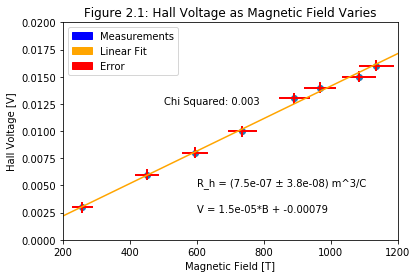

Hall Coefficient: R_h = 7.5e-07 m^3/C ± 3.8e-08 m^3/C


In [27]:
# -------------------------------------------- Part II -----------------------------------------------------------------------
I_sample = 0.020 # Sample current in Amps
B_raw = np.array([0.88,0.84,0.75,0.69,0.57,0.46,0.35,0.20])
dB_raw = 0.02
HV = np.array([0.016,0.015,0.014,0.013,0.010,0.008,0.006,0.003])

B = B_raw*1000*1.29
dB = B*((dB_raw/B_raw)+(0.03/1.29))

plt.scatter(B,HV)
plt.errorbar(B,HV,yerr=dHV,xerr=dB,fmt="none",color='red',elinewidth=2,linewidth=0,marker = '.',
             markersize = 10,label = 'Error')
plt.title("Figure 2.1: Hall Voltage as Magnetic Field Varies")
plt.xlabel("Magnetic Field [T]")
plt.ylabel("Hall Voltage [V]")

linear_fit_2 = odr.Model(linear)
my_data_2 = odr.RealData(B, HV, sx = np.std(B), sy = np.std(HV))
regressed_model_2 = odr.ODR(my_data_2,linear_fit,beta0=[1.49352384e-05, -7.90376060e-04])
regressed_output_2 = regressed_model_2.run()
regressed_output_2.pprint() 

X = np.linspace(100,1300,8)

fitted_params_2 = regressed_output_2.beta
param_sd_2 = regressed_output_2.sd_beta
chi_squared_2 = str(round(regressed_output_2.res_var,3))
fitted_curve_2 = linear(fitted_params_2,X)

hall_coeff = fitted_params_2[0]*d/I_sample
d_hall_coeff = hall_coeff*((dI/I_sample)+(param_sd_2[0]/fitted_params_2[0]))

plt.plot(X,fitted_curve_2,color='orange')
plt.text(500,0.0125,s='Chi Squared: '+ chi_squared_2)
plt.text(600,0.0025,s='V = ' + str(round(fitted_params_2[0],6)) + '*B + ' + str(round(fitted_params_2[1],5)))
plt.text(600,0.0050,s='R_h = (' + str(round(hall_coeff,8)) + " \u00B1 " + str(round(d_hall_coeff,9)) + ") m^3/C")
plt.xlim(200,1200)
plt.ylim(0,0.020)
blue_patch = mpatches.Patch(color='blue', label='Measurements')
orange_patch = mpatches.Patch(color='orange', label='Linear Fit')
red_patch = mpatches.Patch(color='red', label='Error')
plt.legend(handles=[blue_patch,orange_patch,red_patch])

plt.show()

print("Hall Coefficient: R_h = " + str(round(hall_coeff,8)) + " m^3/C \u00B1 " + str(round(d_hall_coeff,9)) + " m^3/C")

The sample current was set to $0.02A$. The magnetic field strength was varied and the Hall voltage for each field was recorded. Uncertainties in magnetic field strength, Hall voltage, and sample current is based on the limited accuracy of the Gaussmeter and multimeters respectively. The slope of the magnetic field versus Hall voltage graph is a function of the Hall coefficient, so the slope is solved for from the slope of Figure 2.1. Uncertainty in the slope comes from ODR and the uncertainty of Hall coefficient comes from error propogation of the slope and sample current using the formula to calculate error propogation for dividing uncertain values.

The chi-squared value of Figure 2.1 is very small, which means the data is over-constrained. More precise measurements of the Hall voltage and magnetic field could have been taken with a more precise multimeter and Gaussmeter respectively. Also, the Gaussmeter probe is very fragile and could be damaged/bent.

Beta: [8.68e+24 6.41e+29 1.01e+00 2.19e+02]
Beta Std Error: [1.05e+24 2.34e+32 2.10e-01 7.96e+04]
Beta Covariance: [[ 3.06e+50  5.52e+58  5.93e+25 -1.87e+31]
 [ 5.52e+58  1.51e+67  1.06e+34 -5.13e+39]
 [ 5.93e+25  1.06e+34  1.21e+01 -3.58e+06]
 [-1.87e+31 -5.13e+39 -3.58e+06  1.74e+12]]
Residual Variance: 0.0036359407659768486
Inverse Condition #: 1.689042520224258e-06
Reason(s) for Halting:
  Sum of squares convergence


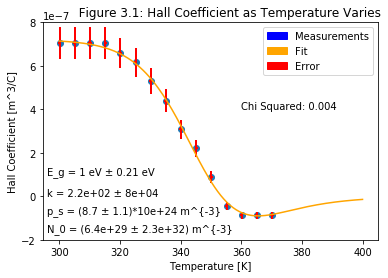

Final Fitted Parameters:
	p_s = 8.7e+24 m^{-3} ± 1.1e+24 m^{-3}
	N_0 = 6.4e+29 ± 2.3e+32
	E_g = 1 eV ± 0.21 eV
	k = 2.2e+02 ± 8e+04


In [40]:
# -------------------------------------------- Part III --------------------------------------------------------------
T_c = np.array([27,32,37,42,47,52,57,62,67,72,77,82,87,92,97])
HV = np.array([0.016,0.016,0.016,0.016,0.015,0.014,0.012,0.010,0.007,0.005,0.002,-0.001,-0.002,-0.002,-0.002])

T_k = T_c + 273.15
dT = 0.5
R_h = (HV*d)/(I_sample*B_true)
dR_h = R_h*((dHV/HV)+(dI/I_sample)+(dB_true/B_true))

plt.scatter(T_k,R_h)
plt.errorbar(T_k,R_h,yerr=dR_h,xerr=dT,fmt="none",color='red',elinewidth=2,linewidth=0,marker = '.',
             markersize = 10,label = 'Error')
plt.title("          Figure 3.1: Hall Coefficient as Temperature Varies")
plt.xlabel("Temperature [K]")
plt.ylabel("Hall Coefficient [m^3/C]")

fit_3 = odr.Model(hall_fit)
my_data_3 = odr.RealData(T_k[5:14], R_h[5:14], sx = np.std(T_k[5:14]), sy = np.std(R_h[5:14]))
regressed_model_3 = odr.ODR(my_data_3,fit_3,beta0=[8.68e+24, 6.55e+29, 1.01e+00, 2.15e+02]) # 1.17e21,1.99e26,0.74,1.81
regressed_output_3 = regressed_model_3.run()
regressed_output_3.pprint() 

X = np.linspace(300,400,200)

fitted_params_3 = regressed_output_3.beta
param_sd_3 = regressed_output_3.sd_beta
chi_squared_3 = str(round(regressed_output_3.res_var,3))
fitted_curve_3 = hall_fit(fitted_params_3,X)

p_s = fitted_params_3[0]
dp_s = param_sd_3[0]
N_0 = fitted_params_3[1]
dN_0 = param_sd_3[1]
E_g = fitted_params_3[2]
dE_g = param_sd_3[2]
k = fitted_params_3[3]
dk = param_sd_3[3]

plt.plot(X,fitted_curve_3,color='orange')
plt.text(360,4e-07,s='Chi Squared: '+ chi_squared_3)
plt.text(296,-0.8e-07,s="p_s = (" + str('%.2g' % (p_s*pow(10,-24))) + " \u00B1 " + str('%.2g' % (dp_s*pow(10,-24))) + ")*10e+24 m^{-3}")
plt.text(296,-1.6e-07,s="N_0 = (" + str('%.2g' % N_0) + " \u00B1 " + str('%.2g' % dN_0) + ") m^{-3}")
plt.text(296,1e-07,s="E_g = " + str('%.2g' % E_g) + " eV \u00B1 " + str('%.2g' % dE_g) + " eV")
plt.text(296,0,s="k = " + str('%.2g' % k) + " \u00B1 " + str('%.2g' % dk))

blue_patch = mpatches.Patch(color='blue', label='Measurements')
orange_patch = mpatches.Patch(color='orange', label='Fit')
red_patch = mpatches.Patch(color='red', label='Error')
plt.legend(handles=[blue_patch,orange_patch,red_patch])

plt.ylim(-2e-07,8e-07)
plt.show()

print("Final Fitted Parameters:")
print("\tp_s = " + str('%.2g' % p_s) + " m^{-3} \u00B1 " + str('%.2g' % dp_s) + " m^{-3}")
print("\tN_0 = " + str('%.2g' % N_0) + " \u00B1 " + str('%.2g' % dN_0))
print("\tE_g = " + str('%.2g' % E_g) + " eV \u00B1 " + str('%.2g' % dE_g) + " eV")
print("\tk = " + str('%.2g' % k) + " \u00B1 " + str('%.2g' % dk))

The sample current was set to $0.02A$ and the magnetic field strength was set to $880T$ on the Gaussmeter, although this isn't the true magnetic field strength (see Procedure). Temperature was measured in degrees Celsius and converted to Kelvin by adding 273.15 to each temperature. Uncertainty in temperature stays the same by doing this since there is no uncertainty in 273.15, and the uncertainty is based on the limited precision of the thermometer. The Hall voltage was mesaured for various temperatures from room temperature to $97^{\circ} C$. The heater circuit was incapable of heating the crystal above $100^{\circ} C$, so there is no data for Hall voltage above $100^{\circ} C$. The data was plotted as Hall coefficient as a function of temperature (Figure 3.1), where the Hall coefficient is the Hall voltage times the depth of the crystal divided by the product of the sample current and magnetic field strength. The data in Figure 3.1 was fit to a function describing the Hall coefficient as a function of temperature using ODR (the function is the fourth to last equation in the Introduction). From this fit, ODR calculates the density of holes ($p_s$), $N_0$ (constant in the effective density of states equation), the gap in energy between the valence level and level where electrons are free to move ($E_g$), and the ratio of the mobilities of holes and electrons ($k$). ODR also calculates uncertainties in these values. The uncertainties in $N_0$ and $k$ are orders of magnitude larger than the calculated values, which makes these values suspicious, but the remaining parameters have reasonable uncertainties.

The chi-squared value for Figure 3.1 is very small, which means the data is over-constrained. Error in these mesaurements most likely comes from how the temperature was measured. The temperature was mesaured by connecting a wire to a thermometer and touching the other end of the thermometer to the crystal. The wire might not have been making full contact with the crystal, which would affect the accuracy of the temperature measurements.

Beta: [2.18 0.02]
Beta Std Error: [0.07 0.  ]
Beta Covariance: [[ 1.91 -0.1 ]
 [-0.1   0.01]]
Residual Variance: 0.002466532333208814
Inverse Condition #: 0.05461933499620752
Reason(s) for Halting:
  Sum of squares convergence
Beta: [-1.41  0.32]
Beta Std Error: [0.66 0.07]
Beta Covariance: [[ 1.1  -0.11]
 [-0.11  0.01]]
Residual Variance: 0.3983350617045714
Inverse Condition #: 0.014670345628328243
Reason(s) for Halting:
  Sum of squares convergence
Beta: [-10.16   1.47]
Beta Std Error: [0.48 0.09]
Beta Covariance: [[25.89 -4.52]
 [-4.52  0.82]]
Residual Variance: 0.008906313187687748
Inverse Condition #: 0.027962161685463935
Reason(s) for Halting:
  Sum of squares convergence


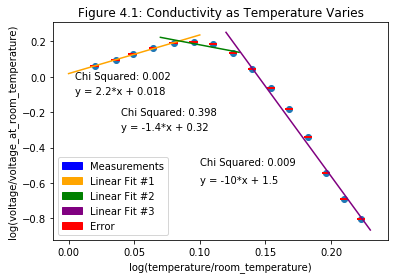

n_1 = 2.2 ± 0.069
n_2 = -1.4 ± 0.66
n_3 = -10.0 ± 0.48


In [7]:
# -------------------------------------------------- Extra Credit --------------------------------------------------------
T_c = np.array([33,38,42,47,52,57,62,67,72,77,82,87,92,97,102])
V = np.array([1.145,1.188,1.226,1.268,1.304,1.314,1.298,1.237,1.130,1.013,0.901,0.766,0.627,0.542,0.482])
T_0 = 27 + 273.15
V_0 = 1.079

T_k = T_c + 273.15
dV = 0.001

lnV = np.log(V)
dlnV = dV/V
y = lnV - np.log(V_0)
dy = dlnV + (dV/V_0)
lnT = np.log(T_k)
dlnT = dT/T_k
x = lnT - np.log(T_0)
dx = dlnT + (dT/T_0)

plt.scatter(x,y)
plt.errorbar(x,y,yerr=dy,xerr=dx,fmt="none",color='red',elinewidth=2,linewidth=0,marker = '.',
             markersize = 10,label = 'Error')
plt.title("Figure 4.1: Conductivity as Temperature Varies")
plt.xlabel("log(temperature/room_temperature)")
plt.ylabel("log(voltage/voltage_at_room_temperature)")

linear_fit = odr.Model(linear)
my_data_1 = odr.RealData(x[0:5], y[0:5], sx = np.std(x[0:5]), sy = np.std(y[0:5]))
regressed_model_1 = odr.ODR(my_data_1,linear_fit,beta0=[2.18459205, 0.01800689])
regressed_output_1 = regressed_model_1.run()
regressed_output_1.pprint() 

X1 = np.linspace(0,0.1,10)

fitted_params_1 = regressed_output_1.beta
param_sd_1 = regressed_output_1.sd_beta
chi_squared_1 = str(round(regressed_output_1.res_var,3))
fitted_curve_1 = linear(fitted_params_1,X1)

plt.plot(X1,fitted_curve_1,color='orange')
plt.text(0.005,-0.015,s='Chi Squared: '+ chi_squared_1)
plt.text(0.005,-0.1,s='y = ' + str('%.2g' % fitted_params_1[0]) + '*x + ' + str('%.2g' % fitted_params_1[1]))


linear_fit = odr.Model(linear)
my_data_2 = odr.RealData(x[4:8], y[4:8], sx = np.std(x[4:8]), sy = np.std(y[4:8]))
regressed_model_2 = odr.ODR(my_data_2,linear_fit,beta0=[1,1])
regressed_output_2 = regressed_model_2.run()
regressed_output_2.pprint() 

X2 = np.linspace(0.07,0.13,10)

fitted_params_2 = regressed_output_2.beta
param_sd_2 = regressed_output_2.sd_beta
chi_squared_2 = str(round(regressed_output_2.res_var,3))
fitted_curve_2 = linear(fitted_params_2,X2)

plt.plot(X2,fitted_curve_2,color='green')
plt.text(0.04,-0.215,s='Chi Squared: '+ chi_squared_2)
plt.text(0.04,-0.3,s='y = ' + str('%.2g' % fitted_params_2[0]) + '*x + ' + str('%.2g' % fitted_params_2[1]))


linear_fit = odr.Model(linear)
my_data_3 = odr.RealData(x[7:15], y[7:15], sx = np.std(x[7:15]), sy = np.std(y[7:15]))
regressed_model_3 = odr.ODR(my_data_3,linear_fit,beta0=[1,1])
regressed_output_3 = regressed_model_3.run()
regressed_output_3.pprint() 

X3 = np.linspace(0.12,0.23,10)

fitted_params_3 = regressed_output_3.beta
param_sd_3 = regressed_output_3.sd_beta
chi_squared_3 = str(round(regressed_output_3.res_var,3))
fitted_curve_3 = linear(fitted_params_3,X3)

plt.plot(X3,fitted_curve_3,color='purple')
plt.text(0.1,-0.5,s='Chi Squared: '+ chi_squared_3)
plt.text(0.1,-0.6,s='y = ' + str('%.2g' % fitted_params_3[0]) + '*x + ' + str('%.2g' % fitted_params_3[1]))


blue_patch = mpatches.Patch(color='blue', label='Measurements')
orange_patch = mpatches.Patch(color='orange', label='Linear Fit #1')
green_patch = mpatches.Patch(color='green', label='Linear Fit #2')
purple_patch = mpatches.Patch(color='purple',label='Linear Fit #3')
red_patch = mpatches.Patch(color='red', label='Error')
plt.legend(handles=[blue_patch,orange_patch,green_patch,purple_patch,red_patch])

plt.show()

print("n_1 = " + str(round(fitted_params_1[0],1)) + ' \u00B1 ' + str(round(param_sd_1[0],3)))
print("n_2 = " + str(round(fitted_params_2[0],1)) + ' \u00B1 ' + str(round(param_sd_2[0],2)))
print("n_3 = " + str(round(fitted_params_3[0],0)) + ' \u00B1 ' + str(round(param_sd_3[0],2)))

Instead of measuring the Hall voltage of the crystal, the voltage of the sample current was measured. The sample voltage and current have uncertainties based on the precision of the multimeters used to measure these quantities. The conductivity of the crystal is proportional to the sample voltage, so the data can be plotted using the last equation in the Introduction. Three different linear fits were fit to the data using ODR because there are different $n$ values for different regions of temperature. Uncertainty in $n$ is just the uncertainty in the slope of the fit associated with that $n$, which is calculated by ODR.

The chi-squared values for all the linear fits are very small, which means all the fits are over-constrained. This could be because each did not have much data. Error in the part of the experiment most likely comes from how the temperature was measured, which I described in Part III of the analysis.

## Conclusion

Figure 1.2:

|Sample Current (A) |Hall Voltage (V)   |Density of Holes (m^-3)      |Mobility of Holes (m/s/eV)   |Velocity of Holes (m/s)   |
|-------------------|-------------------|-----------------------------|-----------------------------|--------------------------|
|$0.033 \pm 0.0005$ |$0.027 \pm 0.0005$ |$2.6*10^{26} \pm 1.7*10^{25}$|$4.0*10^{-6} \pm 2.9*10^{-7}$|$0.0024 \pm 0.00015$      |
|$0.030 \pm 0.0005$ |$0.025 \pm 0.0005$ |$2.8*10^{26} \pm 1.9*10^{25}$|$3.7*10^{-6} \pm 2.7*10^{-7}$|$0.0022 \pm 0.00015$      |
|$0.027 \pm 0.0005$ |$0.022 \pm 0.0005$ |$3.2*10^{26} \pm 2.2*10^{25}$|$3.2*10^{-6} \pm 2.5*10^{-7}$|$0.0019 \pm 0.00013$      |
|$0.024 \pm 0.0005$ |$0.019 \pm 0.0005$ |$3.7*10^{26} \pm 2.7*10^{25}$|$2.8*10^{-6} \pm 2.2*10^{-7}$|$0.0017 \pm 0.00012$      |
|$0.021 \pm 0.0005$ |$0.017 \pm 0.0005$ |$4.2*10^{26} \pm 3.1*10^{25}$|$2.5*10^{-6} \pm 2.1*10^{-7}$|$0.0015 \pm 0.00011$      |
|$0.018 \pm 0.0005$ |$0.015 \pm 0.0005$ |$4.7*10^{26} \pm 3.8*10^{25}$|$2.2*10^{-6} \pm 1.9*10^{-7}$|$0.0013 \pm 0.0001$       |
|$0.015 \pm 0.0005$ |$0.012 \pm 0.0005$ |$5.9*10^{26} \pm 5.2*10^{25}$|$1.8*10^{-6} \pm 1.7*10^{-7}$|$0.0011 \pm 9.3e-05$      |
|$0.012 \pm 0.0005$ |$0.010 \pm 0.0005$ |$7.1*10^{26} \pm 6.8*10^{25}$|$1.5*10^{-6} \pm 1.5*10^{-7}$|$0.00088 \pm 8.5e-05$     |
|$0.009 \pm 0.0005$ |$0.008 \pm 0.0005$ |$8.9*10^{26} \pm 9.6*10^{25}$|$1.2*10^{-6} \pm 1.4*10^{-7}$|$0.00070 \pm 7.6e-05$     |
|$0.006 \pm 0.0005$ |$0.005 \pm 0.0005$ |$1.4*10^{26} \pm 2.1*10^{26}$|$7.3*10^{-7} \pm 1.1*10^{-7}$|$0.00044 \pm 6.4e-05$     |
|$0.003 \pm 0.0005$ |$0.003 \pm 0.0005$ |$2.4*10^{27} \pm 5.0*10^{26}$|$4.4*10^{-7} \pm 9.7*10^{-8}$|$0.00026 \pm 5.6e-05$     |

Hall Coefficient (from Part II):
$$R_h = 7.5*10^{-7} (V*m)/(A*T) \pm 3.8*10^{-8} (V*m)/(A*T)$$

Parameters from Part III:

|Density of Holes (m^-3)      |$N_0$                        |Energy Gap (eV) |Mobility Ratio           |
|-----------------------------|-----------------------------|----------------|-------------------------|
|$8.7*10^{24} \pm 1.1*10^{24}$|$6.4*10^{29} \pm 2.3*10^{32}$|$1 \pm 0.21$    |$2.2*10^{2} \pm 8*10^{4}$|

$n$ in Different Temperature Regions:

| Temperature Range                | $n$             |
|----------------------------------|-----------------|
|$33^{\circ} C$ to $52^{\circ} C$  | $2.2 \pm 0.069$ |
|$52^{\circ} C$ to $67^{\circ} C$  | $-1.4 \pm 0.66$ |
|$67^{\circ} C$ to $102^{\circ} C$ | $-10 \pm 0.48$  |

In Part I, the density of holes is very large, which is accurate because electrons are very small and the units is holes per cubic meter. Mobility and velocity of holes is small, which is accurate because electrons are small, so it takes a long time for electrons to travel small distances. In Part III, the energy gap and density of holes measurements are accurate, but the $N_0$ and mobility ratio values are suspicious because their uncertainties are larger than the values themselves. Error could come from how the temperature was taken by holding a wire to the crystal, which means a human is responsible for making full contact between the wire end and the crystal. Also, different fitting software could have yielded smaller uncertainty.